# 다중 클래스 분류
* https://datascienceschool.net/view-notebook/7a6b958e9d51451689138cca93a047d8/

## Iris dataset

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [43]:
from sklearn.model_selection import train_test_split
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Model

### OvO (One-Vs-One)
* OvO (One-Vs-One) 방법은 K개의 타겟 클래스가 존재하는 경우, 이 중 2개의 클래스 조합을 선택하여 K(K−1)/2개의 이진 클래스 분류 문제를 풀고 이진판별을 통해 가장 많은 판별값을 얻은 클래스를 선택하는 방법이다.

In [66]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
model_ovo = OneVsOneClassifier(LogisticRegression()).fit(X_train, Y_train)

In [67]:
model_ovo.decision_function(X_train[:10])

array([[-0.20612088,  2.18407637,  1.02204452],
       [-0.41543303,  1.19501895,  2.22041408],
       [-0.460547  ,  1.17121045,  2.28933655],
       [-0.41200827,  1.19304437,  2.21896391],
       [-0.5       ,  1.20385036,  2.29614964],
       [-0.20455236,  2.20246402,  1.00208834],
       [-0.49765204,  1.22674189,  2.27091015],
       [-0.26012227,  2.20217921,  1.05794306],
       [-0.2025756 ,  2.19920503,  1.00337057],
       [-0.36081158,  1.19417139,  2.16664019]])

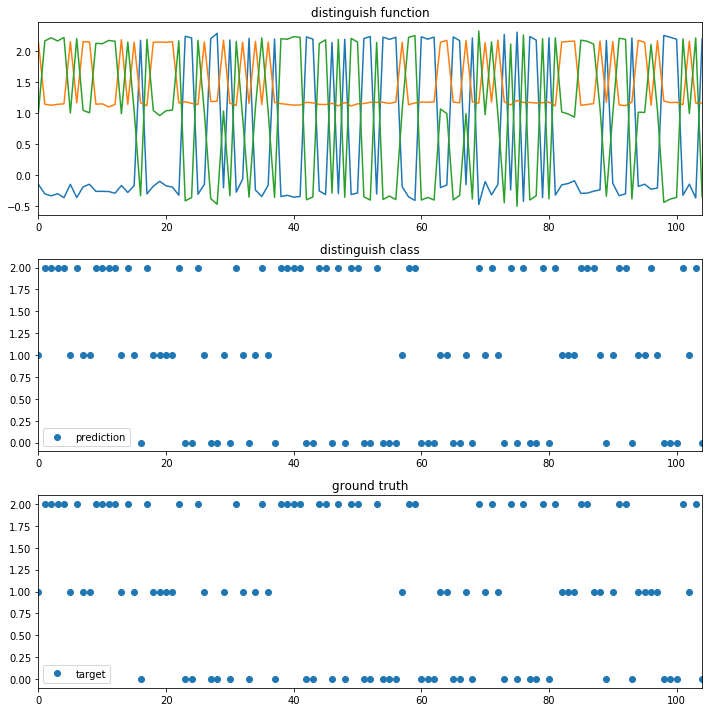

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
pd.DataFrame(model_ovo.decision_function(X_train)).plot(ax=ax1, legend=False)
plt.title("distinguish function")
ax2 = plt.subplot(312)
pd.DataFrame(model_ovo.predict(X_train), columns=["prediction"]).plot(marker='o', ls="", ax=ax2)
plt.title("distinguish class")
ax3 = plt.subplot(313)
pd.DataFrame(Y_train, columns=["target"]).plot(marker='o', ls="", ax=ax3)
plt.title("ground truth")
plt.tight_layout()
plt.show()

In [69]:
model_ovo.score(X_test, Y_test)

0.9555555555555556

### OvR (One-vs-the-Rest)
* OvO 방법은 클래스의 수가 많아지면 실행해야 할 이진 판별 문제의 수가 너무 많아진다.
OvR(One-vs-the-Rest) 방법은 K개의 클래스가 존재하는 경우, 각각의 클래스에 대해 표본이 속하는지(y=1) 속하지 않는지(y=0)의 이진 분류 문제를 푼다. OvO와 달리 클래스 수만큼의 이진 분류 문제를 풀면 된다.
OvR에서도 판별 결과의 수가 같은 동점 문제가 발생할 수가 있기 때문에 각 클래스가 얻은 조건부 확률값을 더해서 이 값이 가장 큰 클래스를 선택한다

In [78]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [70]:
model_ovr = OneVsRestClassifier(LogisticRegression()).fit(X_train, Y_train)

In [80]:
X_train[:5], Y_train[:5]

(array([[5. , 2. , 3.5, 1. ],
        [6.5, 3. , 5.5, 1.8],
        [6.7, 3.3, 5.7, 2.5],
        [6. , 2.2, 5. , 1.5],
        [6.7, 2.5, 5.8, 1.8]]), array([1, 2, 2, 2, 2]))

In [81]:
model_ovr.decision_function(X_train[:10])

array([[ -4.61503712,  -7.67609797,   8.20349454],
       [ -6.54041021,  -9.53131465,  11.67857366],
       [ -6.91875094, -10.45001771,  12.84302615],
       [ -6.29364368,  -8.03021043,  11.21956214],
       [ -7.11126607,  -8.57685765,  12.56831901],
       [ -4.82969849,  -8.53221122,   8.2716278 ],
       [ -7.42974732,  -9.67584818,  12.71574718],
       [ -5.47945673, -10.0937421 ,   9.53361062],
       [ -4.77691085,  -8.37574723,   8.22925201],
       [ -6.08573739,  -9.10954995,  10.80529501]])

In [82]:
model_ovr.predict(X_train[:10])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
pd.DataFrame(model_ovr.decision_function(X_train)).plot(ax=ax1, legend=False)
plt.title("distinguish function")
ax2 = plt.subplot(312)
pd.DataFrame(model_ovr.predict(X_train), columns=["prediction"]).plot(marker='o', ls="", ax=ax2)
plt.title("distinguish class")
ax3 = plt.subplot(313)
pd.DataFrame(Y_train, columns=["target"]).plot(marker='o', ls="", ax=ax3)
plt.title("ground truth")
plt.tight_layout()
plt.show()

In [84]:
model_ovr.score(X_test, Y_test)

0.24444444444444444